# Example 2 - `stripy` predefined meshes

One common use of `stripy` is in meshing x,y coordinates and, to this end, we provide pre-defined meshes for square and elliptical triangulations. A random mesh is included as a counterpoint to the regular meshes. Each of these meshes is also a `Triangulation` object.

The Cartesian mesh classes in `stripy` are:

```python

stripy.cartesian_meshes.square_mesh(extent, spacingX, spacingY)
stripy.cartesian_meshes.elliptical_mesh(extent, spacingX, spacingY)
stripy.cartesian_meshes.random_mesh(extent, number_of_points=5000)
``` 

Any of the above meshes can be uniformly refined by specifying the `refinement_levels` parameter. The square and elliptical meshes come with a `random_scale` parameter that specifies the amount of random noise to be added to the mesh (`random_scale=0` by default).

## Notebook contents

   - [Sample meshes](#Sample-meshes)
   - [Mesh characteristics](#Analysis-of-the-characteristics-of-the-triangulations)
   - [Compare the predefined meshes](#Plot-and-compare-the-predefined-meshes)

The next example is [Ex3-Interpolation](./Ex3-Interpolation.ipynb)

---

## Sample meshes

We create a number of meshes from the basic types available in `stripy` with approximately similar numbers of vertices.

In [1]:
import stripy

## A bunch of meshes with roughly similar overall numbers of points / triangles
xmin = 0.0
xmax = 10.0
ymin = 0.0
ymax = 10.0
extent = [xmin, xmax, ymin, ymax]

spacingX = 1.0
spacingY = 1.0

nsamples = 5000

str_fmt = "{:25} {:3}\t{:6}"


square0  = stripy.cartesian_meshes.square_mesh(extent, spacingX, spacingY, refinement_levels=0)
square2  = stripy.cartesian_meshes.square_mesh(extent, spacingX, spacingY, refinement_levels=2)
squareR  = stripy.cartesian_meshes.square_mesh(extent, spacingX, spacingY, refinement_levels=4)

print(str_fmt.format('Square mesh', square0.npoints, squareR.npoints))

ellip0  = stripy.cartesian_meshes.elliptical_mesh(extent, spacingX, spacingY, refinement_levels=0)
ellip2  = stripy.cartesian_meshes.elliptical_mesh(extent, spacingX, spacingY, refinement_levels=2)
ellipR  = stripy.cartesian_meshes.elliptical_mesh(extent, spacingX, spacingY, refinement_levels=4)

print(str_fmt.format('Elliptical mesh', ellip0.npoints, ellipR.npoints))

randR = stripy.cartesian_meshes.random_mesh(extent, nsamples)
rand0 = stripy.Triangulation(randR.x[::50], randR.y[::50])
rand2 = stripy.Triangulation(randR.x[::25], randR.y[::25])


print(str_fmt.format('Random mesh', rand0.npoints, randR.npoints))

Square mesh               121	 25921
Elliptical mesh            21	  1301
(276,) (276,)
Random mesh               100	  5000


In [2]:
print("Square: {}".format(square0.__doc__))

print("Elliptical: {}".format(ellip0.__doc__))

print("Random: {}".format(randR.__doc__))

Square: 
    A square mesh where points are uniformly populated
    along x and y directions defined by extent.
    
Elliptical: 
    An elliptical mesh where points are successively populated at an
    increasing radius from the midpoint of the extent.

    Caution in parallel and for reproducibility - random noise in point locations !
    
Random: 
    A mesh of random points. Take care if you use this is parallel
    as the location of points will not be the same on all processors.


    


### Analysis of the characteristics of the triangulations

We plot a histogram of the (spherical) areas of the triangles in each of the triangulations normalised by the average area. This is one 
measure of the uniformity of each mesh.

<ipython-input-3-4b83ae55bd0b>:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  freq, area_bin = np.histogram(mesh.areas(), bins=20, normed=True)


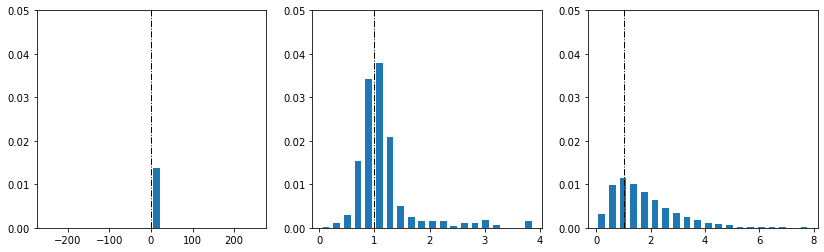

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def area_histo(mesh):
    
    freq, area_bin = np.histogram(mesh.areas(), bins=20, normed=True)
    area = 0.5 * (area_bin[1:] + area_bin[:-1])
    norm_area = area / mesh.areas().mean()
    
    return norm_area, 0.25 * freq*area / np.pi**2

def add_plot(axis, mesh, xlim, ylim):
    u, v = area_histo(mesh)
    width = (u.max() - u.min()) / 30.
    axis.bar(u, v, width=width)
    axis.set_ylim(ylim)
    axis.plot([1.0,1.0], [0.0,1.5], linewidth=1.0, linestyle="-.", color="Black")

    return



fig, ax = plt.subplots(1,3, figsize=(14,4))

xlim=(0.75,1.5)
ylim=(0.0,0.05)

# square

add_plot(ax[0], squareR, xlim, ylim)

# elliptical

add_plot(ax[1], ellipR, xlim, ylim)

# random (this one is very different from the others ... )

add_plot(ax[2], randR, xlim, ylim)



fig.savefig("AreaDistributionsByMesh.png", dpi=250, transparent=True)

### Plot and compare the predefined meshes

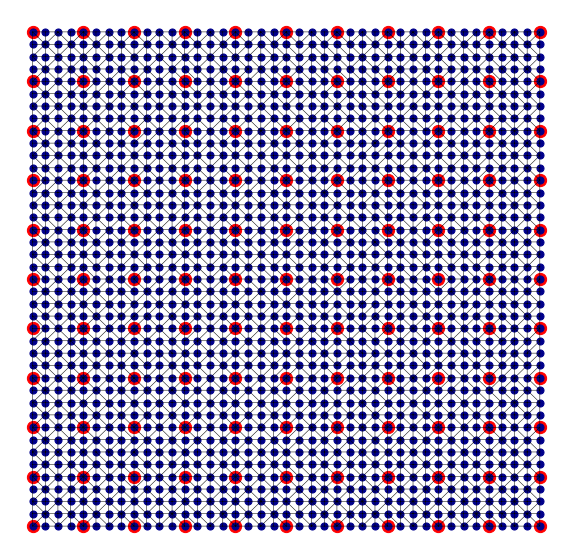

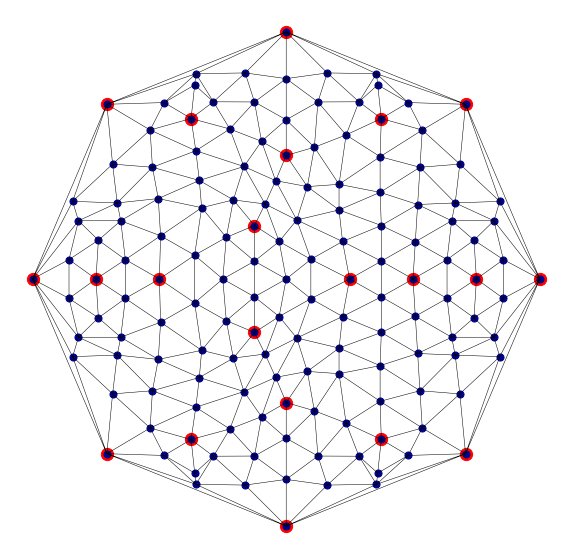

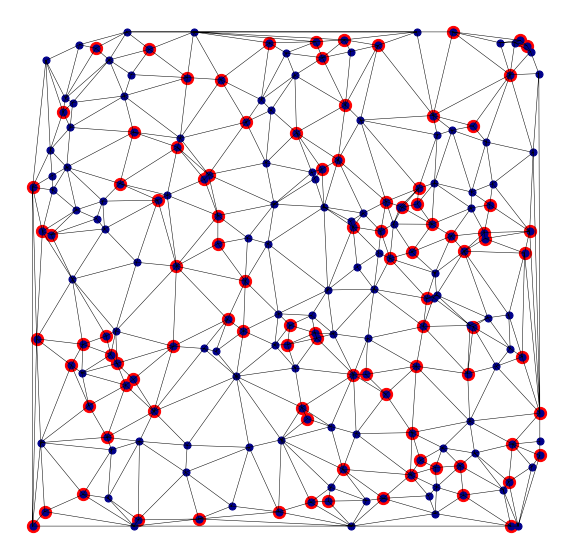

In [4]:
def mesh_fig(mesh, meshR, name):

    fig = plt.figure(figsize=(10, 10), facecolor="none")
    ax  = plt.subplot(111)
    ax.axis('off')

    generator = mesh
    refined   = meshR

    x0 = generator.x
    y0 = generator.y

    xR = refined.x
    yR = refined.y
    

    ax.scatter(x0, y0, color="Red", marker="o", s=150.0)
    ax.scatter(xR, yR, color="DarkBlue", marker="o", s=50.0)
    
    ax.triplot(xR, yR, refined.simplices, color="black", linewidth=0.5)

    fig.savefig(name, dpi=250, transparent=True)
    
    return

mesh_fig(square0,  square2, "Square" )

mesh_fig(ellip0, ellip2, "Elliptical" )

mesh_fig(rand0, rand2, "Random" )

The next example is [Ex3-Interpolation](./Ex3-Interpolation.ipynb)